<a href="https://colab.research.google.com/github/SirisPudasai/ML/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import files
files.upload()

Saving credit_card_fraud_10k.csv to credit_card_fraud_10k (1).csv


{'credit_card_fraud_10k (1).csv': b'transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud\n1,84.47,22,Electronics,0,0,66,3,40,0\n2,541.82,3,Travel,1,0,87,1,64,0\n3,237.01,17,Grocery,0,0,49,1,61,0\n4,164.33,4,Grocery,0,1,72,3,34,0\n5,30.53,15,Food,0,0,79,0,44,0\n6,30.53,13,Clothing,0,0,90,2,46,0\n7,10.77,18,Travel,0,0,48,1,28,0\n8,362.02,13,Electronics,0,0,68,1,40,0\n9,165.43,8,Grocery,0,0,80,0,21,0\n10,221.63,5,Grocery,0,0,59,1,34,0\n11,3.74,16,Grocery,0,0,58,2,28,0\n12,630.64,18,Clothing,0,0,30,4,25,0\n13,321.56,11,Clothing,0,0,73,4,68,0\n14,42.96,3,Travel,0,0,40,2,43,0\n15,36.12,15,Electronics,0,0,37,2,69,0\n16,36.47,10,Clothing,0,0,36,2,66,0\n17,65.3,21,Food,0,0,35,1,25,0\n18,133.91,3,Clothing,0,0,71,2,25,0\n19,101.8,16,Grocery,1,0,84,3,24,0\n20,61.96,7,Electronics,0,0,73,2,68,0\n21,170.35,13,Travel,0,0,76,4,51,0\n22,27.04,1,Clothing,0,0,85,1,49,0\n23,62.19,10,Grocery,0,0,64,2,30,0\

In [38]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [39]:
df=pd.read_csv('credit_card_fraud_10k.csv')


In [40]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [41]:
df.isna().sum()

,0
transaction_id,0
amount,0
transaction_hour,0
merchant_category,0
foreign_transaction,0
location_mismatch,0
device_trust_score,0
velocity_last_24h,0
cardholder_age,0
is_fraud,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [43]:
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [44]:
df.duplicated().sum()


np.int64(0)

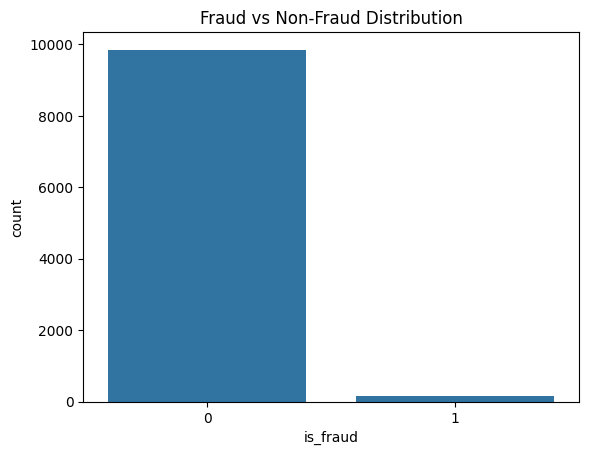

In [45]:
plt.figure()
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

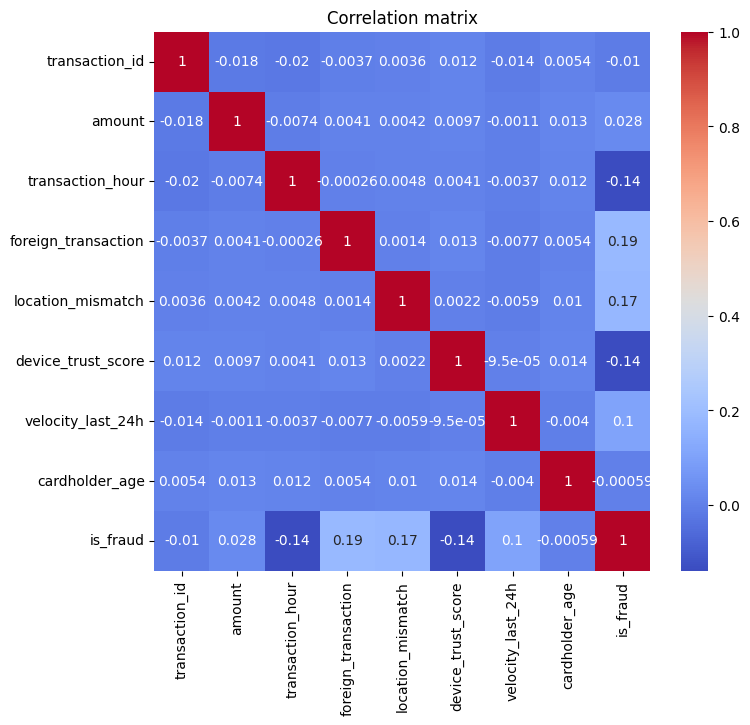

In [46]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [47]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [48]:
# Night time transaction
df["night_transaction"] = df["transaction_hour"].isin([0,1,2,3]).astype(int)

# High amount
df["high_amount"] = (df["amount"] > 900).astype(int)

In [49]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

encoder = LabelEncoder()
df["merchant_category"] = encoder.fit_transform(df["merchant_category"])

In [50]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [53]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print(f'Accuracy:',accuracy_score(y_pred,y_test))
print(f'Accuracy:',precision_score(y_pred,y_test))
print(f'Accuracy:',recall_score(y_pred,y_test))
print(f'Accuracy:',f1_score(y_pred,y_test))

Accuracy: 0.994
Accuracy: 0.6129032258064516
Accuracy: 1.0
Accuracy: 0.76


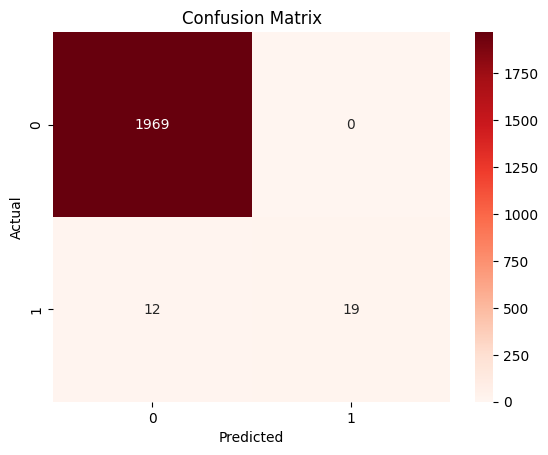

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()